# Machine Learning Project 
## 2024/2025 - Group 16
Sarah Leuthner, 20240581 </br>
Bárbara Capitão, 20211532 </br>
Ricardo Kayseller, 20230450 </br>
Ludovica Collé, 20241449 </br>
Elisa Pacheco, 20240600 </br>

# **Index**
1. [Import Libaries](#imports) </br>
</br>
2. [Data Understanding](#dataunderstanding) </br>
2.1 [Data Exploration](#dataexploration) </br>
2.2 [Checking Incoherences and Anomalies](#checkincoherences)</b>
2.2.1 [Treating Incoherences](#treatingincoherences)</br>
</br>
3. [Data Preprocessing](#datapreprocessing) </br>
3.1 [Splitting Data](#datasplit) </br>
3.2 [Outliers](#outliers) </br>
3.2 [Missing Values](#missingvalues) </br>
3.3 [Outliers](#outliers) </br>
3.4 [Drop Columns](#dropcolumns) </b>
3.5 [Feature Engenireeing](#featureengenireeing) </br>
3.6 [Variable Encoding](#enconding) </br>
3.7 [Scaling](#scaling) </br>
</br>
4. [Feature Selection](#featureselection) </br>
4.1 [Chi Square](#chi)</br>
4.2 [Spearman Correlation](#cor)</br>
4.3 [Decision Tree](#DT) </br>
4.4 [Random Forest](#RF) </br>
4.5 [XGBoosting](#XGB) </br>
4.6 [RFE](#RFE) </br>
4.7 [LASSO](#LASSO) </br>
4.8 [Important Variables from Feature Selection](#importantvariablesFS) </br>
</br>
5. [Modelling](#Modelling) </br>
5.1 [Models Assessment](#modelassement) </br>
5.2 [Models](#models)</br>
5.3 [Combined Models](#combinedmodels)</br>
5.4 [Best Models Hyperparameters Tuning](#hypertunnyng)</br>
</br>
6. [Predictions](#predictions)

<a class="anchor" id="imports">
    
## 1. Import Libaries

</a>

In [148]:
import pandas as pd
import seaborn as sns
import numpy as np 
import os
import missingno as msno
from scipy import stats

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
from matplotlib import cm, colorbar
from matplotlib import colors as mpl_colors

import sqlite3

from sklearn import datasets
import math
from itertools import product
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from datetime import datetime

#Encoding
from sklearn.preprocessing import LabelEncoder


#Data Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
sns.set()


from sklearn.model_selection import GridSearchCV, train_test_split ,RandomizedSearchCV

#Outliers
from collections import Counter

#Feature Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
from xgboost import XGBClassifier


#Modeling
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, StackingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, classification_report

#Hypertuning
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


#App Flask
import pickle


In [149]:
#Importing the csv file to the notebook
#data_set = pd.read_csv(r"C:\Users\Bárbara C\Desktop\Mestrado\Machine lerninig\project_data\train_data.csv")
data_set = pd.read_csv("train_data.csv")

df = data_set.copy()

In [150]:
#test_set = pd.read_csv(r"C:\Users\Bárbara C\Desktop\Mestrado\Machine lerninig\project_data\test_data.csv")
test_set = pd.read_csv("test_data.csv")
test = test_set.copy()


In [151]:
#agreement_reached_test = pd.read_csv(r"C:\Users\Bárbara C\Downloads\Agreement_Reached_test.csv")
agreement_reached_test = pd.read_csv("Agreement_Reached_test.csv")

> As part of our open section, we predicted the Agreement_Reached variable for the test dataset in the notebook OpenSectionC. This allows us to compare the results with and without incorporating Agreement_Reached in our final model.
>To enable this comparison, we will merge the test dataset with the CSV file containing the predictions for this variable.

In [153]:
test_dataframe = pd.merge(
    test,  
    agreement_reached_test,  
    on='Claim Identifier',  
    how='left'  
)

In [154]:
test_dataframe.head(5)

Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date  \
0    2022-12-24             19                              N    2023-01-02   
1    2022-11-20             19                              N    2023-01-02   
2    2022-12-26             59                              N    2023-01-02   
3    2022-12-28             55                              N    2023-01-02   
4    2022-12-20             25                              N    2023-01-02   

  Attorney/Representative  Average Weekly Wage  Birth Year    C-2 Date  \
0                       N                  NaN      2003.0  2023-01-02   
1                       N                  NaN      2003.0  2023-01-02   
2                       N                  0.0      1963.0  2022-12-31   
3                       N                  0.0         0.0  2023-01-02   
4                       N                  0.0      1997.0  2022-12-31   

  C-3 Date                 Carrier Name  ...  \
0      NaN    INDEMNITY INSURANCE CO OF  ...   
1      NaN      A I U INSURANCE COMPANY  ...   
2      NaN    AMGUARD INSURANCE COMPANY  ...   
3      NaN  INDEMNITY INS. OF N AMERICA  ...   
4      NaN   NEW HAMPSHIRE INSURANCE CO  ...   

  OIICS Nature of Injury Description  WCIO Cause of Injury Code  \
0                                NaN                       31.0   
1                                NaN                       75.0   
2                                NaN                       68.0   
3                                NaN                       25.0   
4                                NaN                       79.0   

   WCIO Cause of Injury Description WCIO Nature of Injury Code  \
0           FALL, SLIP OR TRIP, NOC                       10.0   
1          FALLING OR FLYING OBJECT                       10.0   
2                 STATIONARY OBJECT                       49.0   
3  FROM DIFFERENT LEVEL (ELEVATION)                       10.0   
4    OBJECT BEING LIFTED OR HANDLED                       40.0   

  WCIO Nature of Injury Description WCIO Part Of Body Code  \
0                         CONTUSION                   54.0   
1                         CONTUSION                   10.0   
2                    SPRAIN OR TEAR                   62.0   
3                         CONTUSION                   53.0   
4                        LACERATION                   37.0   

  WCIO Part Of Body Description  Zip Code  Number of Dependents  \
0                     LOWER LEG     10466                     1   
1          MULTIPLE HEAD INJURY     11691                     1   
2                      BUTTOCKS     10604                     0   
3                          KNEE     11411                     6   
4                         THUMB     11212                     5   

  Agreement Reached  
0                No  
1                No  
2                No  
3                No  
4                No  

[5 rows x 31 columns]

In [155]:
test = test_dataframe.copy()

In [156]:
test['Agreement Reached'] = test['Agreement Reached'].replace({'Yes': 1.0, 'No': 0.0})

In [157]:
test.head(5)

Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date  \
0    2022-12-24             19                              N    2023-01-02   
1    2022-11-20             19                              N    2023-01-02   
2    2022-12-26             59                              N    2023-01-02   
3    2022-12-28             55                              N    2023-01-02   
4    2022-12-20             25                              N    2023-01-02   

  Attorney/Representative  Average Weekly Wage  Birth Year    C-2 Date  \
0                       N                  NaN      2003.0  2023-01-02   
1                       N                  NaN      2003.0  2023-01-02   
2                       N                  0.0      1963.0  2022-12-31   
3                       N                  0.0         0.0  2023-01-02   
4                       N                  0.0      1997.0  2022-12-31   

  C-3 Date                 Carrier Name  ...  \
0      NaN    INDEMNITY INSURANCE CO OF  ...   
1      NaN      A I U INSURANCE COMPANY  ...   
2      NaN    AMGUARD INSURANCE COMPANY  ...   
3      NaN  INDEMNITY INS. OF N AMERICA  ...   
4      NaN   NEW HAMPSHIRE INSURANCE CO  ...   

  OIICS Nature of Injury Description  WCIO Cause of Injury Code  \
0                                NaN                       31.0   
1                                NaN                       75.0   
2                                NaN                       68.0   
3                                NaN                       25.0   
4                                NaN                       79.0   

   WCIO Cause of Injury Description WCIO Nature of Injury Code  \
0           FALL, SLIP OR TRIP, NOC                       10.0   
1          FALLING OR FLYING OBJECT                       10.0   
2                 STATIONARY OBJECT                       49.0   
3  FROM DIFFERENT LEVEL (ELEVATION)                       10.0   
4    OBJECT BEING LIFTED OR HANDLED                       40.0   

  WCIO Nature of Injury Description WCIO Part Of Body Code  \
0                         CONTUSION                   54.0   
1                         CONTUSION                   10.0   
2                    SPRAIN OR TEAR                   62.0   
3                         CONTUSION                   53.0   
4                        LACERATION                   37.0   

  WCIO Part Of Body Description  Zip Code  Number of Dependents  \
0                     LOWER LEG     10466                     1   
1          MULTIPLE HEAD INJURY     11691                     1   
2                      BUTTOCKS     10604                     0   
3                          KNEE     11411                     6   
4                         THUMB     11212                     5   

  Agreement Reached  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  

[5 rows x 31 columns]

In [158]:
# Checking for duplicates in 'Claim Identifier', the dataset index
duplicate_ids = df['Claim Identifier'][df['Claim Identifier'].duplicated()]

print("Duplicate Claim Identifiers:")
for claim_id in duplicate_ids.unique():
    print(claim_id)

duplicates = df[df['Claim Identifier'].duplicated(keep=False)]

duplicates

Duplicate Claim Identifiers:
292668076


Accident Date  Age at Injury Alternative Dispute Resolution  \
257901           NaN            NaN                            NaN   
526445           NaN            NaN                            NaN   

       Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
257901    2021-05-21                     NaN                  NaN         NaN   
526445    2022-09-05                     NaN                  NaN         NaN   

       C-2 Date C-3 Date Carrier Name  ... WCIO Cause of Injury Code  \
257901      NaN      NaN          NaN  ...                       NaN   
526445      NaN      NaN          NaN  ...                       NaN   

        WCIO Cause of Injury Description WCIO Nature of Injury Code  \
257901                               NaN                        NaN   
526445                               NaN                        NaN   

       WCIO Nature of Injury Description WCIO Part Of Body Code  \
257901                               NaN                    NaN   
526445                               NaN                    NaN   

       WCIO Part Of Body Description Zip Code Agreement Reached  WCB Decision  \
257901                           NaN      NaN               NaN           NaN   
526445                           NaN      NaN               NaN           NaN   

        Number of Dependents  
257901                   NaN  
526445                   NaN  

[2 rows x 33 columns]

> As we can see, the Claim Identifier 292668076 is duplicated, and the rows are not identical because the 'Assembly Date' differs between them. The best approach is to remove both rows

In [160]:
# Removing all rows with duplicate 'Claim Identifier' values
df = df[~df['Claim Identifier'].isin(duplicate_ids)]

In [161]:
#Seting the index
df = df.set_index('Claim Identifier')
df = df.sort_index()

In [162]:
df.head(5)

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5393066             2019-09-17           64.0                              N   
5393091             2019-08-30           46.0                              N   
5393667             2019-12-23           54.0                              N   
5393769             2019-11-14           56.0                              N   
5393770             2019-12-31           26.0                              N   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
5393066             2020-01-01                       N              1345.97   
5393091             2020-01-01                       Y              1745.93   
5393667             2020-01-01                       N                 0.00   
5393769             2020-01-02                       N                 0.00   
5393770             2020-01-02                       N                 0.00   

                  Birth Year    C-2 Date    C-3 Date  \
Claim Identifier                                       
5393066               1954.0  2020-01-01         NaN   
5393091               1973.0  2020-01-01  2020-01-14   
5393667               1965.0  2020-01-01         NaN   
5393769                  0.0         NaN         NaN   
5393770               1993.0  2020-01-02  2019-12-31   

                                   Carrier Name  ...  \
Claim Identifier                                 ...   
5393066              HARTFORD FIRE INSURANCE CO  ...   
5393091            ZURICH AMERICAN INSURANCE CO  ...   
5393667                   DELHAIZE AMERICA, LLC  ...   
5393769           SAFETY NATIONAL CASUALTY CORP  ...   
5393770                    STATE INSURANCE FUND  ...   

                 WCIO Cause of Injury Code WCIO Cause of Injury Description  \
Claim Identifier                                                              
5393066                               97.0                REPETITIVE MOTION   
5393091                               97.0                REPETITIVE MOTION   
5393667                               30.0      SLIP, OR TRIP, DID NOT FALL   
5393769                                NaN                              NaN   
5393770                               12.0                   OBJECT HANDLED   

                 WCIO Nature of Injury Code WCIO Nature of Injury Description  \
Claim Identifier                                                                
5393066                                46.0                           RUPTURE   
5393091                                49.0                    SPRAIN OR TEAR   
5393667                                10.0                         CONTUSION   
5393769                                 NaN                               NaN   
5393770                                10.0                         CONTUSION   

                 WCIO Part Of Body Code WCIO Part Of Body Description  \
Claim Identifier                                                        
5393066                            38.0                   SHOULDER(S)   
5393091                            38.0                   SHOULDER(S)   
5393667                            55.0                         ANKLE   
5393769                             NaN                           NaN   
5393770                            36.0                     FINGER(S)   

                 Zip Code  Agreement Reached      WCB Decision  \
Claim Identifier                                                 
5393066               NaN                1.0  Not Work Related   
5393091             14569                1.0  Not Work Related   
5393667             12189                0.0  Not Work Related   
5393769             18426                0.0  Not Work Related   
5393770             13202                0.0  Not Work Related   

                 Nu

<a class="anchor" id="dataunderstanding">
    
## 2. Data Unterstanding

</a>

<a class="anchor" id="dataexploration">
    
### 2.1 Data Transformation

</a>

In [165]:
#convert the accident date to the type of datatime to get all the values of this variable
df['Accident Date'] = pd.to_datetime(df['Accident Date'], errors='coerce')
df['First Hearing Date'] = pd.to_datetime(df['First Hearing Date'], errors='coerce')
df['Assembly Date'] = pd.to_datetime(df['Assembly Date'], errors='coerce')

df['C-2 Date'] = pd.to_datetime(df['C-2 Date'])
df['C-3 Date'] = pd.to_datetime(df['C-3 Date'])

In [166]:
test['Accident Date'] = pd.to_datetime(test['Accident Date'], errors='coerce')
test['First Hearing Date'] = pd.to_datetime(test['First Hearing Date'], errors='coerce')
test['Assembly Date'] = pd.to_datetime(test['Assembly Date'], errors='coerce')

test['C-2 Date'] = pd.to_datetime(test['C-2 Date'])
test['C-3 Date'] = pd.to_datetime(test['C-3 Date'])

<a class="anchor" id="checkincoherences">
    
### 2.2. Checking incoherences and anomalies

</a>


In [168]:
valid_codes = [
    10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 
    21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 30.0, 31.0, 32.0, 33.0, 34.0, 
    35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 
    46.0, 47.0, 48.0, 49.0, 60.0, 61.0, 62.0, 63.0, 50.0, 51.0, 52.0, 
    53.0, 54.0, 55.0, 56.0, 57.0
]

invalid_codes_in_df = df[~df['WCIO Part Of Body Code'].isin(valid_codes)]['WCIO Part Of Body Code'].unique()

print("Values that are not in the 'valid_codes list':", invalid_codes_in_df)

Values that are not in the 'valid_codes list': [nan -9. 90. 91. 65. 66. 58. 99. 64.]


In [169]:
def filter_zip_codes(zip_codes):
    valid_zip_codes = []
    invalid_zip_codes = []
    
    for code in zip_codes:
        if isinstance(code, str):
            code = code.strip()
            
            #check for valid USA ZIP code (#####)
            if len(code) == 5 and code.isdigit():
                valid_zip_codes.append(code)
                
            #check for valid Canadian Postal Code (A#A #A#)
            elif len(code) == 7 and code[3] == ' ' and code[0:1].isalpha() and code[1:2].isdigit() and code[2:3].isalpha() and \
                 code[4:5].isdigit() and code[5:6].isalpha() and code[6:7].isdigit():
                valid_zip_codes.append(code)
            else:
                invalid_zip_codes.append(code)
        else:
            invalid_zip_codes.append(code)

    return valid_zip_codes, invalid_zip_codes

valid_zip_codes, invalid_zip_codes = filter_zip_codes(df['Zip Code'])

unique_invalid_zip_codes = pd.Series(invalid_zip_codes).unique().tolist()
print("Unique Invalid ZIP Codes:", unique_invalid_zip_codes)

Unique Invalid ZIP Codes: [nan, 'L1N 5', 'T1B0P', 'L6Y 1', 'JMDMR', 'N2P 1', 'H7X3Z', 'L2N 3', 'L0R 1', 'L1A 3', 'T4R1E', 'L7L 6', 'L2W 1', 'K9K 1', '.1605', 'M4E1S', 'L2A 5', 'T2V', 'UNKNO', 'J0L1B', 'AB106', 'J1H2Y', 'L2A 1', 'T1J5G', 'H2T2W', '22-40', 'M3K2C', 'M3K2B', 'T1S 0', 'N6C4E', 'H1V2L', 'V6Z3G', 'KOC 1', 'M6S5B', 'V3H1H', 'L1C0K', 'L2H0H', 'JOL1B', 'SLV', 'BT48-', 'L5N7C', 'JMDCN', 'V6T1Z', 'T2X3P', 'L2A1R', 'L4A0G', 'K6H2L', 'H1V3S', 'L6H 3', 'JMAKN', 'J0J1S', 'B3E1A', 'V6T5C', 'JMBTS', 'V2B0E', 'T6R 0', 'JMDWD', 'M6K3C', 'L9W', 'S7R 0', 'F94A0', 'P7G', 'Z2E1N', 'L0S1N', 'K2L 4', 'H1G0A', 'B3M 3', 14817.0, 13905.0, 12839.0, 12779.0, 11787.0, 12180.0, 10990.0, 13083.0, 11725.0, 14701.0, 11746.0, 14211.0, 11717.0, 11729.0, 14132.0, 11720.0, 13733.0, 11738.0, 12721.0, 12804.0, 14108.0, 13421.0, 12189.0, 12776.0, 14904.0, 10940.0, 11706.0, 12866.0, 11355.0, 32940.0, 10465.0, 11561.0, 11234.0, 11370.0, 10305.0, 13212.0, 14609.0, 11221.0, 10552.0, 11235.0, 11207.0, 11209.0, 1121

In [170]:
valid_zip_codes = pd.Series(valid_zip_codes).unique().tolist()
print(valid_zip_codes)

['14569', '12189', '18426', '13202', '14086', '12150', '13354', '13068', '14743', '14517', '14420', '11701', '13032', '13669', '11704', '14580', '14606', '13092', '13203', '14614', '13212', '14830', '12569', '14202', '13476', '11950', '14025', '14428', '11788', '11746', '13694', '14004', '14048', '11776', '13326', '14108', '14609', '11779', '11941', '14423', '14883', '11764', '14171', '14464', '11742', '13108', '14304', '14903', '11717', '14701', '14623', '11784', '13029', '14094', '13102', '11967', '14170', '14622', '14478', '11754', '13088', '14223', '13165', '14612', '11772', '12550', '85750', '13790', '14075', '14620', '14527', '11796', '13662', '10512', '13435', '14891', '14213', '11756', '13646', '12603', '12205', '12589', '14621', '11769', '12801', '12306', '12116', '12208', '11550', '11428', '11377', '10475', '07010', '10703', '10314', '11206', '11208', '10462', '10466', '10473', '11378', '11101', '08872', '12533', '12534', '12771', '12019', '06422', '10804', '10452', '10128', 

In [171]:
# Remove '.0' from invalid zip codes
cleaned_zip_codes = []

for code in invalid_zip_codes:
    if isinstance(code, float) and code.is_integer():
        cleaned_zip_codes.append(str(int(code)))  # Convert to int to remove '.0'
    else:
        cleaned_zip_codes.append(str(code))  # Keep other codes as is

unique_cleaned_zip_codes = pd.Series(cleaned_zip_codes).unique().tolist()
print("Cleaned ZIP Codes:", unique_cleaned_zip_codes)

Cleaned ZIP Codes: ['nan', 'L1N 5', 'T1B0P', 'L6Y 1', 'JMDMR', 'N2P 1', 'H7X3Z', 'L2N 3', 'L0R 1', 'L1A 3', 'T4R1E', 'L7L 6', 'L2W 1', 'K9K 1', '.1605', 'M4E1S', 'L2A 5', 'T2V', 'UNKNO', 'J0L1B', 'AB106', 'J1H2Y', 'L2A 1', 'T1J5G', 'H2T2W', '22-40', 'M3K2C', 'M3K2B', 'T1S 0', 'N6C4E', 'H1V2L', 'V6Z3G', 'KOC 1', 'M6S5B', 'V3H1H', 'L1C0K', 'L2H0H', 'JOL1B', 'SLV', 'BT48-', 'L5N7C', 'JMDCN', 'V6T1Z', 'T2X3P', 'L2A1R', 'L4A0G', 'K6H2L', 'H1V3S', 'L6H 3', 'JMAKN', 'J0J1S', 'B3E1A', 'V6T5C', 'JMBTS', 'V2B0E', 'T6R 0', 'JMDWD', 'M6K3C', 'L9W', 'S7R 0', 'F94A0', 'P7G', 'Z2E1N', 'L0S1N', 'K2L 4', 'H1G0A', 'B3M 3', '14817', '13905', '12839', '12779', '11787', '12180', '10990', '13083', '11725', '14701', '11746', '14211', '11717', '11729', '14132', '11720', '13733', '11738', '12721', '12804', '14108', '13421', '12189', '12776', '14904', '10940', '11706', '12866', '11355', '32940', '10465', '11561', '11234', '11370', '10305', '13212', '14609', '11221', '10552', '11235', '11207', '11209', '11218', 

In [172]:
invalid_zip_codes = []

for code in unique_cleaned_zip_codes:
    #check if the zip code does not have exactly 5 characters or is not numeric
    if not (len(code) == 5 and code.isnumeric()):
        invalid_zip_codes.append(code)

print(invalid_zip_codes)

['nan', 'L1N 5', 'T1B0P', 'L6Y 1', 'JMDMR', 'N2P 1', 'H7X3Z', 'L2N 3', 'L0R 1', 'L1A 3', 'T4R1E', 'L7L 6', 'L2W 1', 'K9K 1', '.1605', 'M4E1S', 'L2A 5', 'T2V', 'UNKNO', 'J0L1B', 'AB106', 'J1H2Y', 'L2A 1', 'T1J5G', 'H2T2W', '22-40', 'M3K2C', 'M3K2B', 'T1S 0', 'N6C4E', 'H1V2L', 'V6Z3G', 'KOC 1', 'M6S5B', 'V3H1H', 'L1C0K', 'L2H0H', 'JOL1B', 'SLV', 'BT48-', 'L5N7C', 'JMDCN', 'V6T1Z', 'T2X3P', 'L2A1R', 'L4A0G', 'K6H2L', 'H1V3S', 'L6H 3', 'JMAKN', 'J0J1S', 'B3E1A', 'V6T5C', 'JMBTS', 'V2B0E', 'T6R 0', 'JMDWD', 'M6K3C', 'L9W', 'S7R 0', 'F94A0', 'P7G', 'Z2E1N', 'L0S1N', 'K2L 4', 'H1G0A', 'B3M 3', '7822', '7047', '6482', '7032', '7062', '7104', '6763', '7070', '7040', '6820', '7882', '7726', '7052', '7421', '7642', '7660', '7728', '7103', '6610', '6810', '7601', '7083', '7093', '7302', '8527', '5478', '7632', '6606', '7738', '8857', '8618', '7306', '7304', '677', '7458', '7834', '7018', '7011', '7624', '7603', '6401', '6830', '7036', '8863', '7206', '7073', '7105', '7002', '7305', '7108', '7463',

<a class="anchor" id="treatingincoherences">
    
#### 2.2.1. Treating Incoherences

</a>

In [174]:
#replacing specific strings with np.nan in the entire DataFrame
df = df.replace('nan', np.nan)
df = df.replace('UK', np.nan)
df = df.replace('U', np.nan)
df['County of Injury'] = df['County of Injury'].replace('UNKNOWN', np.nan)

df['WCIO Part Of Body Code'] = df['WCIO Part Of Body Code'].replace([-9.0, 90.0, 91.0, 65.0, 66.0, 58.0, 99.0, 64.0],np.nan)

df['Birth Year'] = df['Birth Year'].replace([0.0], np.nan)
df['Age at Injury'] = df['Age at Injury'].replace([0.0], np.nan)

In [175]:
test = test.replace('nan', np.nan)
test = test.replace('UK', np.nan)
test = test.replace('U', np.nan)
test['County of Injury'] = test['County of Injury'].replace('UNKNOWN', np.nan)

test['WCIO Part Of Body Code'] = test['WCIO Part Of Body Code'].replace([-9.0, 90.0, 91.0, 65.0, 66.0, 58.0, 99.0, 64.0],np.nan)

test['Birth Year'] = test['Birth Year'].replace([0.0], np.nan)
test['Age at Injury'] = test['Age at Injury'].replace([0.0], np.nan)

In [176]:
# replacing invalid zip codes with NaN
df['Zip Code'] = df['Zip Code'].apply(lambda x: np.nan if x in invalid_zip_codes else x)
test['Zip Code'] = test['Zip Code'].apply(lambda x: np.nan if x in invalid_zip_codes else x)

In [177]:
df['Carrier Name'] = df['Carrier Name'].str.replace('.', '', regex = False).str.replace(',', '', regex = False)
test['Carrier Name'] = test['Carrier Name'].str.replace('.', '', regex = False).str.replace(',', '', regex = False)

In [178]:
initial_row_count = len(df)

invalid_accident_date_condition = (
    (df['Accident Date'] > df['C-2 Date']) |
    (df['Accident Date'] > df['C-3 Date']) |
    (df['Accident Date'] > df['Assembly Date']) |
    (df['Accident Date'] > df['First Hearing Date'])
)

#set Accident Date to nan for invalid rows
df.loc[invalid_accident_date_condition, 'Accident Date'] = np.nan

final_row_count = len(df)
rows_affected = invalid_accident_date_condition.sum()
percentage_affected = (rows_affected / initial_row_count) * 100

print(f"Percentage of rows affected: {percentage_affected:.2f}%")

Percentage of rows affected: 0.29%


In [179]:
invalid_accident_date_condition_test = (
    (test['Accident Date'] > test['C-2 Date']) |
    (test['Accident Date'] > test['C-3 Date']) |
    (test['Accident Date'] > test['Assembly Date']) |
    (test['Accident Date'] > test['First Hearing Date'])
)

test.loc[invalid_accident_date_condition_test, 'Accident Date'] = np.nan

In [180]:
#We decided to drop all rows that contain only the 'Assembly Date' and the index 'Claim Identifier'
columns_to_check = ['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
                    'Attorney/Representative', 'Average Weekly Wage',
                    'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
                    'Claim Injury Type', 'County of Injury',
                    'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
                    'IME-4 Count', 'Industry Code', 'Industry Code Description',
                    'Medical Fee Region', 'OIICS Nature of Injury Description',
                    'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
                    'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
                    'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
                    'Agreement Reached', 'WCB Decision', 'Number of Dependents']

condition = df[columns_to_check].isna().all(axis=1)

df = df[~condition]

final_row_count = len(df)

percentage_dropped = ((initial_row_count - final_row_count) / initial_row_count) * 100
print(f"Percentage of rows dropped: {percentage_dropped:.2f}%")

Percentage of rows dropped: 3.28%


In [181]:
#check the % of missing values of each variable
missing_values = df.isna().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})

missing_data_sorted = missing_data.sort_values(by='Missing Percentage', ascending=False)
print(missing_data_sorted)

                                    Missing Values  Missing Percentage
OIICS Nature of Injury Description          574026          100.000000
IME-4 Count                                 441223           76.864637
First Hearing Date                          423228           73.729761
C-3 Date                                    386781           67.380397
WCIO Part Of Body Code                      107173           18.670409
Birth Year                                   54159            9.434938
Medical Fee Region                           33473            5.831269
Zip Code                                     28986            5.049597
Average Weekly Wage                          28651            4.991237
WCIO Part Of Body Description                17082            2.975823
WCIO Nature of Injury Description            15657            2.727577
WCIO Nature of Injury Code                   15657            2.727577
WCIO Cause of Injury Description             15640            2.724615
WCIO C

**RULE** Many data science resources recommend thresholds around 30% to 50% missing values as a rule of thumb. Above this threshold, filling the values can introduce bias or noise, and removing the variable might be preferable.

### Critical Missing Data Analysis:

1. **C-3 Date**: 67.38% missing. 
- **Action**: With such a high percentage of missing data, this column is a candidate for removal unless there’s a specific reason to retain it. The data might not be available for most cases.
   

2. **First Hearing Date**: 73.72% missing.
- **Action**: This column has an even higher percentage of missing data. If it’s not essential for the analysis, it’s recommended to remove it.

3. **IME-4 Count**: 76.86% missing.
- **Action**: This column can likely be removed due to the high percentage of missing values, as it may not be relevant to most cases.

4. **OIICS Nature of Injury Description**: 100.00% missing.
- **Action**: Since all values are missing, this column should be removed from the dataset.

### Final Recommendation:
- **Columns to remove**: "C-3 Date", "First Hearing Date", "IME-4 Count", "OIICS Nature of Injury Description".
- These columns have high percentages of missing data and are unlikely to provide meaningful insights in their current state. It's best to drop them to improve data quality and reduce unnecessary noise in your analysis
- However, before dropping them, we should see if they can provide relevant insights

<a class="anchor" id="datapreprocessing">

## 3. Data Preprocessing

</a>

<a class="anchor" id="datasplit">

### 3.1 Split Data

</a>

In [185]:
target = df['Claim Injury Type']
df.drop(['Claim Injury Type'], axis=1,  inplace=True)

In [186]:
X_train, X_val, y_train, y_val = train_test_split(df, target,
                                                 train_size=0.75,
                                                 stratify = target,
                                                 random_state = 42)

<a class="anchor" id="outliers">

### 3.2 Outliers

</a>

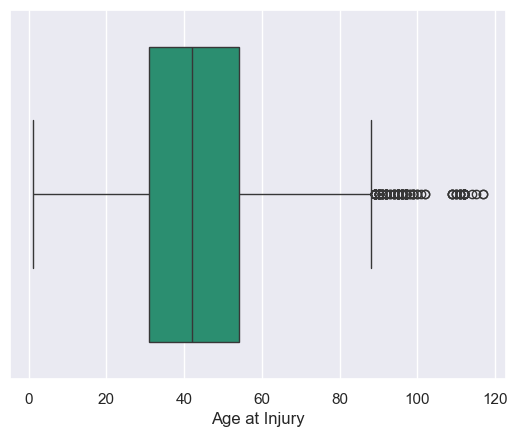

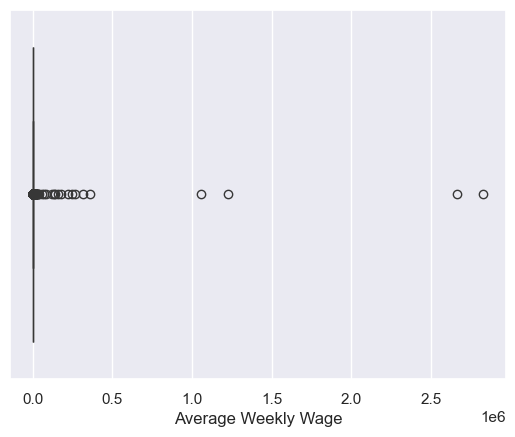

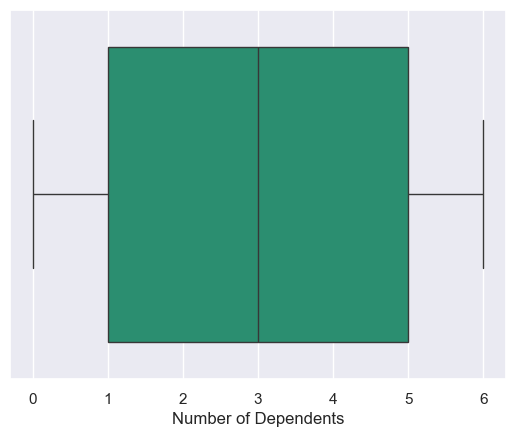

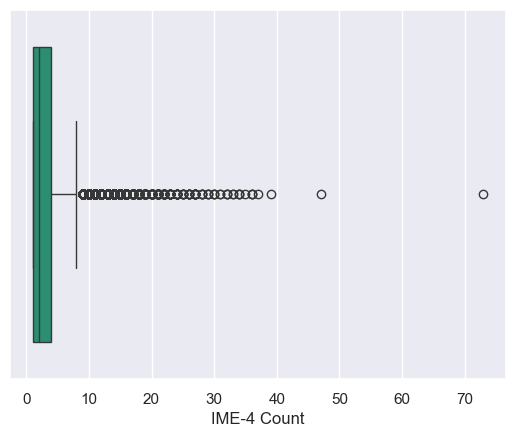

In [188]:
numerical_features = ["Age at Injury", "Average Weekly Wage", "Number of Dependents", 'IME-4 Count']

#plot a boxplot for each column
for i in X_train[numerical_features]:
    sns.boxplot(data = X_train, x = i, palette = 'Dark2')
    plt.show()

In [189]:
features = ["Age at Injury", "Average Weekly Wage", "IME-4 Count"]

percentiles_99 = {}

for feature in features:
    percentile_99 = np.percentile(X_train[feature].dropna(), 99.95)
    percentiles_99[feature] = percentile_99
    print(f"99th Percentile for {feature}: {percentile_99}")


99th Percentile for Age at Injury: 85.0
99th Percentile for Average Weekly Wage: 5338.975510000024
99th Percentile for IME-4 Count: 24.25


In [190]:
percentiles_1 = {}

for feature in features:
    percentile_1 = np.percentile(X_train[feature].dropna(), 0.05)
    percentiles_1[feature] = percentile_1
    print(f"1th Percentile for {feature}: {percentile_1}")

1th Percentile for Age at Injury: 16.0
1th Percentile for Average Weekly Wage: 0.0
1th Percentile for IME-4 Count: 1.0


In [191]:
filters = (
    
    (X_train['Age at Injury']<=89)
    &
    (X_train['Average Weekly Wage']<=10000)
    &
    (X_train['Age at Injury']>=10)

)                              

X_train = X_train[filters]
y_train = y_train[filters]


<a class="anchor" id="missingvalues">
    
### 3.3 Missing Values

</a>

In [193]:
datasets = [X_train, X_val, test]

In [233]:
X_train['C-2 Date Binary'] = X_train['C-2 Date'].notna().astype(int)
X_val['C-2 Date Binary'] = X_val['C-2 Date'].notna().astype(int)
test['C-2 Date Binary'] = test['C-2 Date'].notna().astype(int)

In [234]:
columns = ['Accident Date','C-2 Date'] 
for col in columns:
    #Calculating the average difference in days between the dates
    mean_days_diff = (X_train['Assembly Date'] - X_train[col]).dt.days.mean()
    print(f"Average days between {col} and Assembly Date: {mean_days_diff} days")
    for df in datasets: 
        df[col] = df.apply(
            lambda row: row['Assembly Date'] - pd.Timedelta(days=mean_days_diff) if pd.isnull(row[col]) else row[col], axis=1)
        
X_train[['Accident Date', 'Assembly Date', 'C-2 Date']].head()

Average days between Accident Date and Assembly Date: 78.88894697331942 days
Average days between C-2 Date and Assembly Date: 3.828482517376622 days


Accident Date Assembly Date   C-2 Date
Claim Identifier                                       
5894651             2022-01-01    2022-01-10 2022-01-10
5850530             2021-10-30    2021-11-04 2021-11-04
5705618             2021-04-15    2021-04-21 2021-04-21
5725357             2021-05-07    2021-05-18 2021-05-18
6102313             2022-09-27    2022-10-06 2022-10-06

In [235]:
#Age at injury
# as accident date and assembly date have on average only some mothns diference and the age at injury is the age in accidente date
# we can calculate the age by finding the year difference between Assembly Date and Birth Year
# Only for rows where Age at Injury is missing

for df in datasets:
    mask = df['Age at Injury'].isna() & df['Accident Date'].notna() & df['Birth Year'].notna()
    df.loc[mask, 'Age at Injury'] = df.loc[mask, 'Accident Date'].dt.year - df.loc[mask, 'Birth Year']

median_age_injury = X_train['Age at Injury'].median()

for df in datasets:
            df['Age at Injury'] = df['Age at Injury'].fillna(median_age_injury).apply(np.floor).astype(int)
X_train[['Accident Date', 'Birth Year', 'Age at Injury']].tail(70)

Accident Date  Birth Year  Age at Injury
Claim Identifier                                         
5766861             2021-07-14      1967.0             54
5671744             2021-02-18      1966.0             54
5961847             2022-04-03      1973.0             49
6081769             2022-08-23      1961.0             61
6000101             2022-04-28      1976.0             45
...                        ...         ...            ...
5791325             2021-08-07      2001.0             19
5508826             2020-06-28      1998.0             22
5801930             2021-06-11         NaN             48
5529429             2020-08-01      1994.0             26
5775199             2020-07-31      1964.0             56

[70 rows x 3 columns]

In [236]:
median_col = X_train['Age at Injury'].median()

for df in datasets:
    df['Age at Injury'] = df['Age at Injury'].fillna(median_col).apply(np.floor).astype(int)
   

In [237]:
columns = ['Alternative Dispute Resolution'] 

for col in columns:
    col_mode = X_train[col].mode()[0]
    print(col_mode)
    for df in datasets:
            df[col] = df[col].fillna(col_mode)
    

N


In [238]:
def impute_mode_grouping_by_category(col_1, col_2, row, col_2_mode, general_mode):
    if pd.isna(row[col_1]):
        if pd.notna(row[col_2]):
            return col_2_mode.get(row[col_2], general_mode)  
        else:
            return general_mode
    else:
        return row[col_1]

In [239]:
columns = ['Carrier Type', 'Carrier Name', 'Gender']

for col_1 in columns:
    industry_mode = X_train.groupby('Industry Code')[col_1].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    
    general_mode = X_train[col_1].mode().iloc[0] 
    print(col_1)
    print(general_mode)


    for df in datasets:
        df[col_1] = df.apply(lambda row: impute_mode_grouping_by_category(col_1=col_1, col_2='Industry Code', row=row, col_2_mode=industry_mode, general_mode=general_mode), axis=1)
    
    print(X_train[col_1])

Carrier Type
1A. PRIVATE
Claim Identifier
5894651     3A. SELF PUBLIC
5850530         1A. PRIVATE
5705618         1A. PRIVATE
5725357         1A. PRIVATE
6102313         1A. PRIVATE
                 ...       
5791325         1A. PRIVATE
5508826         1A. PRIVATE
5801930     3A. SELF PUBLIC
5529429    4A. SELF PRIVATE
5775199     3A. SELF PUBLIC
Name: Carrier Type, Length: 404864, dtype: object
Carrier Name
STATE INSURANCE FUND
Claim Identifier
5894651         NIAGARA CO MUT SELF INS
5850530       INDEMNITY INSURANCE CO OF
5705618    AMERICAN ZURICH INSURANCE CO
5725357       ACE AMERICAN INSURANCE CO
6102313     ARCH INDEMNITY INSURANCE CO
                       ...             
5791325        NEW JERSEY MANUFACTURERS
5508826      NEW HAMPSHIRE INSURANCE CO
5801930          POLICE FIRE SANITATION
5529429        WEGMANS FOOD MARKETS INC
5775199        RYE CITY SCHOOL DISTRICT
Name: Carrier Name, Length: 404864, dtype: object
Gender
M
Claim Identifier
5894651    M
5850530    F
5705618

In [240]:
#County of Injury
district_mode = X_train.groupby('District Name')['County of Injury'].apply(lambda z: z.mode().iloc[0] if not z.mode().empty else None)

county_general_mode = X_train['County of Injury'].mode().iloc[0]

for df in datasets:
    df['County of Injury'] = df.apply(lambda row: impute_mode_grouping_by_category(col_1='County of Injury', col_2='District Name', row=row, col_2_mode=district_mode, general_mode=county_general_mode), axis=1)

print(X_train['County of Injury'])

Claim Identifier
5894651        NIAGARA
5850530       ONONDAGA
5705618          BRONX
5725357          BRONX
6102313         QUEENS
              ...     
5791325         QUEENS
5508826       DUTCHESS
5801930          BRONX
5529429         MONROE
5775199    WESTCHESTER
Name: County of Injury, Length: 404864, dtype: object


In [241]:
#Average Weekly Wage    
wage_industry_median = X_train.groupby('Industry Code')['Average Weekly Wage'].median()
print(wage_industry_median)

wage_general_median = X_train['Average Weekly Wage'].median()
print(wage_general_median)

for df in datasets:
        df['Average Weekly Wage'] = df.apply(lambda row: impute_mode_grouping_by_category(col_1='Average Weekly Wage', col_2='Industry Code', row=row, col_2_mode=wage_industry_median, general_mode=wage_general_median), axis=1)


Industry Code
11.0      0.000
21.0      0.000
22.0      0.000
23.0    480.925
31.0      0.000
32.0      0.000
33.0      0.000
42.0      0.000
44.0      0.000
45.0      0.000
48.0    250.000
49.0      0.000
51.0      0.000
52.0      0.000
53.0      0.000
54.0      0.000
55.0      0.000
56.0      0.000
61.0      0.000
62.0      0.000
71.0      0.000
72.0      0.000
81.0      0.000
92.0      0.000
Name: Average Weekly Wage, dtype: float64
0.0


In [242]:
def fill_with_county_and_district_mode(df, target_column, county_column, district_column, global_fallback):
    mode_per_county =  X_train.groupby(county_column)[target_column].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    mode_per_district =  X_train.groupby(district_column)[target_column].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

    df[target_column] = df.apply(
        lambda row: (
            mode_per_county[row[county_column]] if pd.isnull(row[target_column]) and pd.notnull(row[county_column])
            else mode_per_district[row[district_column]] if pd.isnull(row[target_column]) and pd.notnull(row[district_column])
            else global_fallback if pd.isnull(row[target_column])
            else row[target_column]
        ),
        axis=1
    )
    return df

medical_mode = X_train['Medical Fee Region'].mode()[0]

for df in datasets:
    fill_with_county_and_district_mode(df, target_column = 'Medical Fee Region' , county_column = 'County of Injury' , district_column = 'District Name', global_fallback = medical_mode)

In [243]:
data = {
    'Industry Code': [11.0, 21.0, 22.0, 23.0, 31.0, 32.0, 33.0, 42.0, 44.0, 45.0,
                      48.0, 49.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 61.0, 
                      62.0, 71.0, 72.0, 81.0, 92.0],
    'Industry Code Description': [
        'AGRICULTURE, FORESTRY, FISHING AND HUNTING', 'MINING', 'UTILITIES', 
        'CONSTRUCTION', 'MANUFACTURING', 'MANUFACTURING', 'MANUFACTURING', 
        'WHOLESALE TRADE', 'RETAIL TRADE', 'RETAIL TRADE', 
        'TRANSPORTATION AND WAREHOUSING', 'TRANSPORTATION AND WAREHOUSING', 
        'INFORMATION', 'FINANCE AND INSURANCE', 'REAL ESTATE AND RENTAL AND LEASING', 
        'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES', 
        'MANAGEMENT OF COMPANIES AND ENTERPRISES', 
        'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIATION', 
        'EDUCATIONAL SERVICES', 'HEALTH CARE AND SOCIAL ASSISTANCE', 
        'ARTS, ENTERTAINMENT, AND RECREATION', 
        'ACCOMMODATION AND FOOD SERVICES', 
        'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)', 
        'PUBLIC ADMINISTRATION'
    ]
}

mode_industry = X_train['Industry Code'].mode()[0] 

X_train['Industry Code'] = X_train['Industry Code'].apply(pd.to_numeric, errors='coerce')
X_val['Industry Code'] = X_val['Industry Code'].apply(pd.to_numeric, errors='coerce')
test['Industry Code'] = test['Industry Code'].apply(pd.to_numeric, errors='coerce')


X_train['Industry Code Description'] = X_train['Industry Code Description'].astype(str)
X_val['Industry Code Description'] = X_val['Industry Code Description'].astype(str)
test['Industry Code Description'] = test['Industry Code Description'].astype(str)


aggregated_df = X_train.groupby('Industry Code').agg(
    {'Industry Code Description': lambda x: sorted(x.unique())}
).reset_index()

industry_dict = dict(zip(aggregated_df['Industry Code'], aggregated_df['Industry Code Description']))

industry_dict

X_train['Industry Code'] = X_train['Industry Code'].fillna(mode_industry)
X_val['Industry Code'] = X_val['Industry Code'].fillna(mode_industry)
test['Industry Code'] = test['Industry Code'].fillna(mode_industry)


industry_dict = dict(zip(X_train['Industry Code'], X_train['Industry Code Description']))

X_train['Industry Code Description'] = X_train['Industry Code'].map(industry_dict)
X_val['Industry Code Description'] = X_val['Industry Code'].map(industry_dict)
test['Industry Code Description'] = test['Industry Code'].map(industry_dict)


X_train[['Industry Code', 'Industry Code Description']].head(10)


Industry Code  \
Claim Identifier                  
5894651                    92.0   
5850530                    62.0   
5705618                    44.0   
5725357                    23.0   
6102313                    56.0   
5798486                    62.0   
5818637                    62.0   
5719407                    92.0   
5478827                    23.0   
6123475                    92.0   

                                          Industry Code Description  
Claim Identifier                                                     
5894651                                       PUBLIC ADMINISTRATION  
5850530                           HEALTH CARE AND SOCIAL ASSISTANCE  
5705618                                                RETAIL TRADE  
5725357                                                CONSTRUCTION  
6102313           ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...  
5798486                           HEALTH CARE AND SOCIAL ASSISTANCE  
5818637                           HEALTH CARE AND SOCIAL ASSISTANCE  
5719407                                       PUBLIC ADMINISTRATION  
5478827                                                CONSTRUCTION  
6123475                                       PUBLIC ADMINISTRATION

In [244]:
#We search to get the codes and theirs descriptions

# WCIO Cause of Injury Code and their Descriptions as per the provided order
cause_of_injury_dict = {
    1.0: 'Chemicals',
    2.0: 'Hot Objects or Substances',
    3.0: 'Temperature Extremes',
    4.0: 'Fire or Flame',
    5.0: 'Steam or Hot Fluids',
    6.0: 'Dust, Gases, Fumes or Vapors',
    7.0: 'Welding Operation',
    8.0: 'Radiation',
    9.0: 'Contact With, NOC',
    10.0: 'Machine or Machinery',
    11.0: 'Cold Objects or Substances',
    12.0: 'Object Handled',
    13.0: 'Caught In, Under or Between, NOC',
    14.0: 'Abnormal Air Pressure',
    15.0: 'Broken Glass',
    16.0: 'Hand Tool, Utensil; Not Powered',
    17.0: 'Object Being Lifted or Handled',
    18.0: 'Powered Hand Tool, Appliance',
    19.0: 'Cut, Puncture, Scrape, NOC',
    20.0: 'Collapsing Materials (Slides of Earth)',
    25.0: 'From Different Level (Elevation)',
    26.0: 'From Ladder or Scaffolding',
    27.0: 'From Liquid or Grease Spills',
    28.0: 'Into Openings',
    29.0: 'On Same Level',
    30.0: 'Slip, or Trip, Did Not Fall',
    31.0: 'Fall, Slip or Trip, NOC',
    32.0: 'On Ice or Snow',
    33.0: 'On Stairs',
    40.0: 'Crash of Water Vehicle',
    41.0: 'Crash of Rail Vehicle',
    45.0: 'Collision or Sideswipe With Another Vehicle',
    46.0: 'Collision with a Fixed Object',
    47.0: 'Crash of Airplane',
    48.0: 'Vehicle Upset',
    50.0: 'Motor Vehicle, NOC',
    52.0: 'Continual Noise',
    53.0: 'Twisting',
    54.0: 'Jumping or Leaping',
    55.0: 'Holding or Carrying',
    56.0: 'Lifting',
    57.0: 'Pushing or Pulling',
    58.0: 'Reaching',
    59.0: 'Using Tool or Machinery',
    60.0: 'Strain or Injury By, NOC',
    61.0: 'Wielding or Throwing',
    65.0: 'Moving Part of Machine',
    66.0: 'Object Being Lifted or Handled',
    67.0: 'Sanding, Scraping, Cleaning Operation',
    68.0: 'Stationary Object',
    69.0: 'Stepping on Sharp Object',
    70.0: 'Striking Against or Stepping On, NOC',
    74.0: 'Fellow Worker, Patient or Other Person',
    75.0: 'Falling or Flying Object',
    76.0: 'Hand Tool or Machine in Use',
    77.0: 'Motor Vehicle',
    78.0: 'Moving Parts of Machine',
    79.0: 'Object Being Lifted or Handled',
    80.0: 'Object Handled By Others',
    81.0: 'Struck or Injured, NOC',
    82.0: 'Absorption, Ingestion or Inhalation, NOC',
    83.0: 'Pandemic',
    84.0: 'Electrical Current',
    85.0: 'Animal or Insect',
    86.0: 'Explosion or Flare Back',
    87.0: 'Foreign Matter (Body) in Eye(s)',
    88.0: 'Natural Disasters',
    89.0: 'Person in Act of a Crime',
    90.0: 'Other Than Physical Cause of Injury',
    91.0: 'Mold',
    93.0: 'Gunshot',
    94.0: 'Repetitive Motion',
    95.0: 'Rubbed or Abraded, NOC',
    96.0: 'Terrorism',
    97.0: 'Repetitive Motion',
    98.0: 'Cumulative, NOC',
    99.0: 'Other - Miscellaneous, NOC'
}

mode_value = X_train['WCIO Cause of Injury Code'].mode()[0]  

for df in datasets:
    df['WCIO Cause of Injury Code'] = df['WCIO Cause of Injury Code'].fillna(mode_value)
    df['WCIO Cause of Injury Code'] = pd.to_numeric(df['WCIO Cause of Injury Code'], errors='coerce')
    df['WCIO Cause of Injury Description'] = df['WCIO Cause of Injury Code'].map(cause_of_injury_dict)


X_train[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].head(10)

WCIO Cause of Injury Code  \
Claim Identifier                              
5894651                                89.0   
5850530                                31.0   
5705618                                75.0   
5725357                                76.0   
6102313                                68.0   
5798486                                74.0   
5818637                                45.0   
5719407                                83.0   
5478827                                81.0   
6123475                                57.0   

                             WCIO Cause of Injury Description  
Claim Identifier                                               
5894651                              Person in Act of a Crime  
5850530                               Fall, Slip or Trip, NOC  
5705618                              Falling or Flying Object  
5725357                           Hand Tool or Machine in Use  
6102313                                     Stationary Object  
5798486                Fellow Worker, Patient or Other Person  
5818637           Collision or Sideswipe With Another Vehicle  
5719407                                              Pandemic  
5478827                                Struck or Injured, NOC  
6123475                                    Pushing or Pulling

In [245]:
# WCIO Nature of Injury Code and their Descriptions as per the provided order
nature_of_injury_dict = {
    1.0: 'No Physical Injury',
    2.0: 'Amputation',
    3.0: 'Angina Pectoris',
    4.0: 'Burn',
    7.0: 'Concussion',
    10.0: 'Contusion',
    13.0: 'Crushing',
    16.0: 'Dislocation',
    19.0: 'Electric Shock',
    22.0: 'Enucleation',
    25.0: 'Foreign Body',
    28.0: 'Fracture',
    30.0: 'Freezing',
    31.0: 'Hearing Loss or Impairment',
    32.0: 'Heat Prostration',
    34.0: 'Hernia',
    36.0: 'Infection',
    37.0: 'Inflammation',
    38.0: 'Adverse reaction to a vaccination orinoculation',
    40.0: 'Laceration',
    41.0: 'Myocardial Infarction',
    42.0: 'Poisoning - General (Not OD or Cumulative Injury)',
    43.0: 'Puncture',
    46.0: 'Rupture',
    47.0: 'Severance',
    49.0: 'Sprain or Tear',
    52.0: 'Strain or Tear',
    53.0: 'Syncope',
    54.0: 'Asphyxiation',
    55.0: 'Vascular',
    58.0: 'Vision Loss',
    59.0: 'All Other Specific Injuries, NOC',
    60.0: 'Dust Disease, NOC',
    61.0: 'Asbestosis',
    62.0: 'Black Lung',
    63.0: 'Byssinosis',
    64.0: 'Silicosis',
    65.0: 'Respiratory Disorders',
    66.0: 'Poisoning - Chemical, (Other Than Metals)',
    67.0: 'Poisoning - Metal',
    68.0: 'Dermatitis',
    69.0: 'Mental Disorder',
    70.0: 'Radiation',
    71.0: 'All Other Occupational Disease Injury, NOC',
    72.0: 'Loss of Hearing',
    73.0: 'Contagious Disease',
    74.0: 'Cancer',
    75.0: 'AIDS',
    76.0: 'VDT - Related Diseases',
    77.0: 'Mental Stress',
    78.0: 'Carpal Tunnel Syndrome',
    79.0: 'Hepatitis C',
    83.0: 'COVID-19',
    80.0: 'All Other Cumulative Injury, NOC',
    90.0: 'Multiple Physical Injuries Only',
    91.0: 'Multiple Injuries Including Both Physical and Psychological'
}

mode_value = X_train['WCIO Nature of Injury Code'].mode()[0]

for df in datasets:
    df['WCIO Nature of Injury Code'] = df['WCIO Nature of Injury Code'].fillna(mode_value)
    df['WCIO Nature of Injury Code'] = pd.to_numeric(df['WCIO Nature of Injury Code'], errors='coerce')
    df['WCIO Nature of Injury Description'] = df['WCIO Nature of Injury Code'].map(nature_of_injury_dict)

X_train[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].head(60)

WCIO Nature of Injury Code WCIO Nature of Injury Description
Claim Identifier                                                              
5894651                                 28.0                          Fracture
5850530                                 80.0  All Other Cumulative Injury, NOC
5705618                                 37.0                      Inflammation
5725357                                 40.0                        Laceration
6102313                                 40.0                        Laceration
5798486                                 13.0                          Crushing
5818637                                  1.0                No Physical Injury
5719407                                 83.0                          COVID-19
5478827                                 28.0                          Fracture
6123475                                 52.0                    Strain or Tear
5762930                                 52.0                    Strain or Tear
5687278                                 19.0                    Electric Shock
5819183                                 10.0                         Contusion
5727184                                 52.0                    Strain or Tear
5499781                                 10.0                         Contusion
5583327                                 13.0                          Crushing
5997958                                 52.0                    Strain or Tear
5977082                                 10.0                         Contusion
5536784                                 73.0                Contagious Disease
5803979                                 52.0                    Strain or Tear
5501590                                 59.0  All Other Specific Injuries, NOC
5792205                                 10.0                         Contusion
6156652                                  4.0                              Burn
6125791                                 10.0                         Contusion
6074581                                 52.0                    Strain or Tear
5823910                                 10.0                         Contusion
5516791                                  1.0                No Physical Injury
5791605                                 10.0                         Contusion
5707800                                 52.0                    Strain or Tear
5635490                                 52.0                    Strain or Tear
5740412                                 59.0  All Other Specific Injuries, NOC
6100804                                  7.0                        Concussion
6102335                                 52.0                    Strain or Tear
5884200                                 52.0                    Strain or Tear
5719546                                 49.0                    Sprain or Tear
5819985                                 28.0                          Fracture
5589648                                 43.0                          Puncture
5976618                                 10.0                         Contusion
5595444                                 83.0                          COVID-19
6094531                                 36.0                         Infection
5999567                                 10.0                         Contusion
5841741                                 53.0                           Syncope
6083601                                 52.0                    Strain or Tear
5821180                                 52.0                    Strain or Tear
6003822                                 40.0                        Laceration
5938747                                 10.0                         Contusion
5449581                                 10.0                         Contusion
5968032                                 52.0                    Strain or Tear
5501246                                 90.0   Multiple Physical Inj

In [246]:
part_body_dict = {
    10.0: 'Multiple Head Injury',
    11.0: 'Skull',
    12.0: 'Brain',
    13.0: 'Ear(s)',
    14.0: 'Eye(s)',
    15.0: 'Nose',
    16.0: 'Teeth',
    17.0: 'Mouth',
    18.0: 'Soft Tissue',
    19.0: 'Facial Bones',
    20.0: 'Multiple Neck Injury',
    21.0: 'Vertebrae',
    22.0: 'Disc',
    23.0: 'Spinal Cord',
    24.0: 'Larynx',
    25.0: 'Soft Tissue',
    26.0: 'Trachea',
    30.0: 'Multiple Upper Extremities',
    31.0: 'Upper Arm',
    32.0: 'Elbow',
    33.0: 'Lower Arm',
    34.0: 'Wrist',
    35.0: 'Hand',
    36.0: 'Finger(s)',
    37.0: 'Thumb',
    38.0: 'Shoulder(s)',
    39.0: 'Wrist (s) & Hand(s)',
    40.0: 'Multiple Trunk',
    41.0: 'Upper Back Area',
    42.0: 'Lower Back Area',
    43.0: 'Disc',
    44.0: 'Chest',
    45.0: 'Sacrum and Coccyx',
    46.0: 'Pelvis',
    47.0: 'Spinal Cord',
    48.0: 'Internal Organs',
    49.0: 'Heart',
    60.0: 'Lungs',
    61.0: 'Abdomen Including Groin',
    62.0: 'Buttocks',
    63.0: 'Lumbar & or Sacral Vertebrae(Vertebra NOC Trunk)',
    50.0: 'Multiple Lower Extremities',
    51.0: 'Hip',
    52.0: 'Upper Leg',
    53.0: 'Knee',
    54.0: 'Lower Leg',
    55.0: 'Ankle',
    56.0: 'Foot',
    57.0: 'Toes'
}


mode_value = X_train['WCIO Part Of Body Code'].mode()[0]
print(mode_value)


for df in datasets:
    df['WCIO Part Of Body Code'] = df['WCIO Part Of Body Code'].fillna(mode_value)
    df['WCIO Part Of Body Code'] = pd.to_numeric(df['WCIO Part Of Body Code'], errors='coerce')
    df['WCIO Part Of Body Description'] = df['WCIO Part Of Body Code'].map(part_body_dict)

X_train[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].head()

42.0


WCIO Part Of Body Code WCIO Part Of Body Description
Claim Identifier                                                      
5894651                             35.0                          Hand
5850530                             34.0                         Wrist
5705618                             35.0                          Hand
5725357                             36.0                     Finger(s)
6102313                             10.0          Multiple Head Injury

In [247]:
#Zip Code
X_train['Zip Code'] = X_train['Zip Code'].fillna('UNKNOWN')
X_val['Zip Code'] = X_val['Zip Code'].fillna('UNKNOWN')
test['Zip Code'] = test['Zip Code'].fillna('UNKNOWN')


In [248]:
#IME-4 Count
X_train['IME-4 Count'] = X_train['IME-4 Count'].fillna(0)
X_val['IME-4 Count'] = X_val['IME-4 Count'].fillna(0)
test['IME-4 Count'] = test['IME-4 Count'].fillna(0)


In [249]:
X_train

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5894651             2022-01-01             38                              N   
5850530             2021-10-30             50                              N   
5705618             2021-04-15             44                              N   
5725357             2021-05-07             49                              N   
6102313             2022-09-27             54                              N   
...                        ...            ...                            ...   
5791325             2021-08-07             19                              N   
5508826             2020-06-28             22                              N   
5801930             2021-06-11             48                              N   
5529429             2020-08-01             26                              N   
5775199             2020-07-31             56                              N   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
5894651             2022-01-10                       Y              1734.45   
5850530             2021-11-04                       N                 0.00   
5705618             2021-04-21                       N                 0.00   
5725357             2021-05-18                       N                 0.00   
6102313             2022-10-06                       N                 0.00   
...                        ...                     ...                  ...   
5791325             2021-08-17                       N                 0.00   
5508826             2020-07-01                       Y               702.50   
5801930             2021-08-31                       Y              2081.79   
5529429             2020-08-04                       N                 0.00   
5775199             2021-07-27                       N                 0.00   

                  Birth Year   C-2 Date C-3 Date  \
Claim Identifier                                   
5894651               1983.0 2022-01-10      NaT   
5850530               1970.0 2021-11-04      NaT   
5705618               1976.0 2021-04-21      NaT   
5725357               1972.0 2021-05-18      NaT   
6102313               1967.0 2022-10-06      NaT   
...                      ...        ...      ...   
5791325               2001.0 2021-08-17      NaT   
5508826               1998.0 2020-07-01      NaT   
5801930                  NaN 2021-08-31      NaT   
5529429               1994.0 2020-08-04      NaT   
5775199               1964.0 2021-07-27      NaT   

                                  Carrier Name  ...  \
Claim Identifier                                ...   
5894651                NIAGARA CO MUT SELF INS  ...   
5850530              INDEMNITY INSURANCE CO OF  ...   
5705618           AMERICAN ZURICH INSURANCE CO  ...   
5725357              ACE AMERICAN INSURANCE CO  ...   
6102313            ARCH INDEMNITY INSURANCE CO  ...   
...                                        ...  ...   
5791325               NEW JERSEY MANUFACTURERS  ...   
5508826             NEW HAMPSHIRE INSURANCE CO  ...   
5801930                 POLICE FIRE SANITATION  ...   
5529429               WEGMANS FOOD MARKETS INC  ...   
5775199               RYE CITY SCHOOL DISTRICT  ...   

                        WCIO Cause of Injury Description  \
Claim Identifier                                           
5894651                         Person in Act of a Crime   
5850530                          Fall, Slip or Trip, NOC   
5705618                         Falling or Flying Object   
5725357                      Hand Tool or Machine in Use   
6102313                                Stationary Object   
...                                                  ...   
5791325                                        On Stairs   
5508826        

In [250]:
#check the % of missing values of each variable
missing_values= X_train.isna().sum()

missing_values

Accident Date                              0
Age at Injury                              0
Alternative Dispute Resolution             0
Assembly Date                              0
Attorney/Representative                    0
Average Weekly Wage                        0
Birth Year                             37105
C-2 Date                                   0
C-3 Date                              273996
Carrier Name                               0
Carrier Type                               0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    298606
Gender                                     0
IME-4 Count                                0
Industry Code                              0
Industry Code Description                  0
Medical Fee Region                         0
OIICS Nature of Injury Description    404864
WCIO Cause of Injury Code                  0
WCIO Cause

In [251]:
#check the % of missing values of each variable
missing_values= X_val.isna().sum()

missing_values

Accident Date                              0
Age at Injury                              0
Alternative Dispute Resolution             0
Assembly Date                              0
Attorney/Representative                    0
Average Weekly Wage                        0
Birth Year                             13420
C-2 Date                                   0
C-3 Date                               96903
Carrier Name                               0
Carrier Type                               0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    105904
Gender                                     0
IME-4 Count                                0
Industry Code                              0
Industry Code Description                  0
Medical Fee Region                         0
OIICS Nature of Injury Description    143507
WCIO Cause of Injury Code                  0
WCIO Cause

In [252]:
missing_values= test.isna().sum()

missing_values

Accident Date                              0
Age at Injury                              0
Alternative Dispute Resolution             0
Assembly Date                              0
Attorney/Representative                    0
Average Weekly Wage                        0
Birth Year                             39066
C-2 Date                                   0
C-3 Date                              302759
Carrier Name                               0
Carrier Type                               0
Claim Identifier                           0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    344947
Gender                                     0
IME-4 Count                                0
Industry Code                              0
Industry Code Description                  0
Medical Fee Region                         0
OIICS Nature of Injury Description    387975
WCIO Cause

<a class="anchor" id="dropcolumns">

### 3.4 Drop Columns

</a>

We will dropped several features for the following reasons:

- **'OIICS Nature of Injury Description'**: This column was entirely missing (100%)
- **'C-3 Date'**: This column had a lot of missing values (+ 60%).
- **'WCB Decision'**: This column contained only one unique value, making it a non-informative univariate feature.
- **'Birth Year'**: With a high correlation of 0.99 to **'Age at Injury'**, it provided redundant information. We kept 'Age at Injury' instead, as 'Birth Year' had more missing values.
- **Description Columns**: We removed description columns that duplicated information already provided by code columns. Instead, we retained a dictionary for easy lookup of the code 

Despite the fact that **'IME-4 Count'** and **'First Hearing Date'** also have a lot of missing values (+ 60%), instead of dropping them we will have a diferent aproach.

In [254]:
drop_variables = ['OIICS Nature of Injury Description','WCB Decision',
           'WCIO Cause of Injury Description', 
           'WCIO Nature of Injury Description', 
           'WCIO Part Of Body Description', 
           'C-3 Date',
           'Industry Code Description',
           'Birth Year']

In [255]:
X_train.drop(drop_variables, axis=1,  inplace=True)

In [256]:
X_val.drop(drop_variables, axis=1,  inplace=True)

In [257]:
test.drop(['OIICS Nature of Injury Description',
           'WCIO Cause of Injury Description', 
       'WCIO Nature of Injury Description', 
       'WCIO Part Of Body Description', 
       'Industry Code Description',
       'C-3 Date', 
        'Birth Year'
          ], axis=1,  inplace=True)

In [258]:
#check the % of missing values of each variable
missing_values= X_train.isna().sum()

missing_values

Accident Date                          0
Age at Injury                          0
Alternative Dispute Resolution         0
Assembly Date                          0
Attorney/Representative                0
Average Weekly Wage                    0
C-2 Date                               0
Carrier Name                           0
Carrier Type                           0
County of Injury                       0
COVID-19 Indicator                     0
District Name                          0
First Hearing Date                298606
Gender                                 0
IME-4 Count                            0
Industry Code                          0
Medical Fee Region                     0
WCIO Cause of Injury Code              0
WCIO Nature of Injury Code             0
WCIO Part Of Body Code                 0
Zip Code                               0
Agreement Reached                      0
Number of Dependents                   0
C-2 Date Binary                        0
dtype: int64

In [259]:
#check the % of missing values of each variable
missing_values= X_val.isna().sum()

missing_values

Accident Date                          0
Age at Injury                          0
Alternative Dispute Resolution         0
Assembly Date                          0
Attorney/Representative                0
Average Weekly Wage                    0
C-2 Date                               0
Carrier Name                           0
Carrier Type                           0
County of Injury                       0
COVID-19 Indicator                     0
District Name                          0
First Hearing Date                105904
Gender                                 0
IME-4 Count                            0
Industry Code                          0
Medical Fee Region                     0
WCIO Cause of Injury Code              0
WCIO Nature of Injury Code             0
WCIO Part Of Body Code                 0
Zip Code                               0
Agreement Reached                      0
Number of Dependents                   0
C-2 Date Binary                        0
dtype: int64

<a class="anchor" id="featureengenireeing">

### 3.5. Feature Engenireeing

<a/>

How to deal with the dates? We thought to use this dates to create new features that give some information as how much time pass between the different step of the injury process.

We thought that we can create some new variable from the different date:
- _Declaration Date_ = days elapsed between  the accident occurred and when the worker reported it
- _Receiving time of C-2_=time after the injury for the C2 Form to be received

In [262]:
def apply_binning(newfeature):
    for category, codes in bins.items():
        if newfeature in codes:
            return category
    return '0'  

In [263]:
#The worker has only 30 days after the accident to file a claim
# Calculate the time differences in X_train
X_train['Declaration time'] = X_train['Assembly Date'] - X_train['Accident Date']
X_train['Receiving time of C-2'] = X_train['C-2 Date'] - X_train['Accident Date']

# Convert the time differences to integer number of days
X_train['Declaration time'] = X_train['Declaration time'].dt.days
X_train['Receiving time of C-2'] = X_train['Receiving time of C-2'].dt.days

In [264]:
# Calculate the time differences for X_val
X_val['Declaration time'] = X_val['Assembly Date'] - X_val['Accident Date']
X_val['Receiving time of C-2'] = X_val['C-2 Date'] - X_val['Accident Date']

# Convert the time differences to integer number of days
X_val['Declaration time'] = X_val['Declaration time'].dt.days
X_val['Receiving time of C-2'] = X_val['Receiving time of C-2'].dt.days

In [265]:
# Calculate the time differences for test
test['Declaration time'] = test['Assembly Date'] - test['Accident Date']
test['Receiving time of C-2'] = test['C-2 Date'] - test['Accident Date']

# Convert the time differences to integer number of days
test['Declaration time'] = test['Declaration time'].dt.days
test['Receiving time of C-2'] = test['Receiving time of C-2'].dt.days

In [266]:
# Convert First Hearing Date to binary (1 if it has a date, 0 if it is missing)
X_train['First Hearing Binary'] = X_train['First Hearing Date'].notna().astype(int)
X_val['First Hearing Binary'] = X_val['First Hearing Date'].notna().astype(int)
test['First Hearing Binary'] = test['First Hearing Date'].notna().astype(int)

In [267]:
X_train['Accident Year'] = pd.to_datetime(X_train['Accident Date']).dt.year
X_val['Accident Year'] = pd.to_datetime(X_val['Accident Date']).dt.year
test['Accident Year'] = pd.to_datetime(test['Accident Date']).dt.year

In [268]:
X_train['log_IME-4 Count'] = np.log1p(X_train['IME-4 Count'])
X_val['log_IME-4 Count'] = np.log1p(X_val['IME-4 Count'])
test['log_IME-4 Count'] = np.log1p(test['IME-4 Count'])

In [269]:
X_train['log_Average Weekly Wage'] = np.log1p(X_train['Average Weekly Wage'])
X_val['log_Average Weekly Wage'] = np.log1p(X_val['Average Weekly Wage'])
test['log_Average Weekly Wage'] = np.log1p(test['Average Weekly Wage'])

In [270]:
#check if the worker has benefits
def check_wage(wage):
    if wage == 0:
        return 'No Benefit'  # No wage replacement benefit if AWW is 0
    else:
        return 'Eligible for Benefit'  # Wage replacement benefit eligible if AWW > 0

X_train['Wage Replacement Eligibility'] = X_train['Average Weekly Wage'].apply(check_wage)
X_val['Wage Replacement Eligibility'] = X_val['Average Weekly Wage'].apply(check_wage)
test['Wage Replacement Eligibility'] = test['Average Weekly Wage'].apply(check_wage)

In [271]:
#check the age at injury 
def check_retirement_status(age):
    retirement_age = 62
    
    if age > retirement_age:
        return 'Retirement Age'
    else:
        return 'Working Age'
        
X_train['Retirement Status'] = X_train['Age at Injury'].apply(check_retirement_status)
X_val['Retirement Status'] = X_val['Age at Injury'].apply(check_retirement_status)
test['Retirement Status'] = test['Age at Injury'].apply(check_retirement_status)

In [272]:
#check if the notification of the injury was made in due time
def check_notification_status(declaration_time):
    if declaration_time <= 30:
        return 'Notification On Time'
    else:
        return 'Notification Late'

X_train['Notification Status'] = X_train['Declaration time'].apply(check_notification_status)
X_val['Notification Status'] = X_val['Declaration time'].apply(check_notification_status)
test['Notification Status'] = test['Declaration time'].apply(check_notification_status)

In [273]:
#bins = {
#    'I. Burn or Scald - Heat or Cold Exposures-Contact With': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 11.0, 14.0, 84.0],
#    'II. Caught In, Under or Between': [10.0, 12.0, 13.0, 20.0],
#    'III. Cut, Puncture, Scrape Injured By': [15.0, 16.0, 17.0, 18.0, 19.0],
#    'IV. Fall, Slip or Trip Injury': [25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0],
#    'V. Motor Vehicle': [40.0, 41.0, 45.0, 46.0, 47.0, 48.0, 50.0],
#    'VI. Strain or Injury By': [52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 97.0],
#    'VII. Striking Against or Stepping On': [65.0, 66.0, 67.0, 68.0, 69.0, 70.0],
#    'VIII. Struck or Injured By': [74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 85.0, 86.0],
#    'IX. Rubbed or Abraded By': [94.0, 95.0],
#    'X. Miscellaneous Causes': [82.0, 83.0, 87.0, 88.0, 89.0, 90.0, 91.0, 93.0, 96.0, 98.0, 99.0]
#}

bins = {
    '1': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 11.0, 14.0, 84.0],
    '2': [10.0, 12.0, 13.0, 20.0],
    '3': [15.0, 16.0, 17.0, 18.0, 19.0],
    '4': [25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0],
    '5': [40.0, 41.0, 45.0, 46.0, 47.0, 48.0, 50.0],
    '6': [52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 97.0],
    '7': [65.0, 66.0, 67.0, 68.0, 69.0, 70.0],
    '8': [74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 85.0, 86.0],
    '9': [94.0, 95.0],
    '10': [82.0, 83.0, 87.0, 88.0, 89.0, 90.0, 91.0, 93.0, 96.0, 98.0, 99.0]
}

X_train['cause_injury_category'] = X_train['WCIO Cause of Injury Code'].apply(apply_binning)
X_val['cause_injury_category'] = X_val['WCIO Cause of Injury Code'].apply(apply_binning)
test['cause_injury_category'] = test['WCIO Cause of Injury Code'].apply(apply_binning)

print(X_train[['WCIO Cause of Injury Code', 'cause_injury_category']])

cause_injury_category_encoder = 'cause_injury_category_encoder.pkl'

with open(cause_injury_category_encoder, 'wb') as f:
    pickle.dump(bins, f)


                  WCIO Cause of Injury Code cause_injury_category
Claim Identifier                                                 
5894651                                89.0                    10
5850530                                31.0                     4
5705618                                75.0                     8
5725357                                76.0                     8
6102313                                68.0                     7
...                                     ...                   ...
5791325                                33.0                     4
5508826                                57.0                     6
5801930                                25.0                     4
5529429                                56.0                     6
5775199                                74.0                     8

[404864 rows x 2 columns]


In [274]:
#bins = {
#    'I. Specific Injury': [2.0, 4.0, 7.0, 10.0, 13.0, 16.0, 19.0, 25.0, 28.0, 40.0, 41.0, 43.0, 46.0, 47.0, 49.0, 52.0, 59.0],
#    'II. Occupational Disease or Cumulative Injury': [60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 76.0, 78.0, 79.0, 80.0],
#    'III. Multiple Injuries': [90.0, 91.0]
#}

bins = {
    '1': [1.0, 2.0, 3.0, 4.0, 7.0, 10.0, 13.0, 16.0, 19.0, 22.0, 25.0, 28.0, 30.0, 31.0, 32.0, 34.0, 36.0, 37.0, 38.0, 40.0, 41.0, 42.0, 43.0, 46.0, 47.0, 49.0, 52.0, 53.0, 54.0, 55.0, 58.0, 59.0],
    '2': [60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 83.0],
    '3': [90.0, 91.0]
}

X_train['nature_injury_category'] = X_train['WCIO Nature of Injury Code'].apply(apply_binning)
X_val['nature_injury_category'] = X_val['WCIO Nature of Injury Code'].apply(apply_binning)
test['nature_injury_category'] = test['WCIO Nature of Injury Code'].apply(apply_binning)

print(X_train[['WCIO Nature of Injury Code', 'nature_injury_category']])

nature_injury_cateogory_encoder = 'nature_injury_cateogory_encoder.pkl'

# Save the dictionary
with open(nature_injury_cateogory_encoder, 'wb') as f:
    pickle.dump(bins, f)


                  WCIO Nature of Injury Code nature_injury_category
Claim Identifier                                                   
5894651                                 28.0                      1
5850530                                 80.0                      2
5705618                                 37.0                      1
5725357                                 40.0                      1
6102313                                 40.0                      1
...                                      ...                    ...
5791325                                 40.0                      1
5508826                                 16.0                      1
5801930                                 10.0                      1
5529429                                 52.0                      1
5775199                                 10.0                      1

[404864 rows x 2 columns]


In [275]:
# Defining bins for each anatomic category
#bins = {
 #   'I. Head': [10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0],
  #  'II. Neck': [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0],
   # 'III. Upper Extremities': [30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0],
   # 'IV. Trunk': [40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 60.0, 61.0, 62.0, 63.0],
   # 'V. Lower Extremities': [50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0]
#}


bins = {
    '1': [10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0],
    '2': [20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0],
    '3': [30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0],
    '4': [40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 60.0, 61.0, 62.0, 63.0],
    '5': [50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0]
}


X_train['body_category'] = X_train['WCIO Part Of Body Code'].apply(apply_binning)
X_val['body_category'] = X_val['WCIO Part Of Body Code'].apply(apply_binning)
test['body_category'] = test['WCIO Part Of Body Code'].apply(apply_binning)

print(X_train[['WCIO Part Of Body Code', 'body_category']])

body_category_encoder = 'body_category_encoder.pkl'

# Salvar o dicionário no ficheiro
with open(body_category_encoder, 'wb') as f:
    pickle.dump(bins, f)


                  WCIO Part Of Body Code body_category
Claim Identifier                                      
5894651                             35.0             3
5850530                             34.0             3
5705618                             35.0             3
5725357                             36.0             3
6102313                             10.0             1
...                                  ...           ...
5791325                             54.0             5
5508826                             38.0             3
5801930                             53.0             5
5529429                             42.0             4
5775199                             33.0             3

[404864 rows x 2 columns]


In [276]:
datasets = [X_train, X_val, test]

In [277]:
# Zip codes of each state
zip_codes_by_state = {
    "AL": {"start": 35201, "end": 36925},
    "AK": {"start": 99501, "end": 99950},
    "AZ": {"start": 85001, "end": 86556},
    "AR": {"start": 72201, "end": 72959},
    "CA": {"start": 90001, "end": 96162},
    "CO": {"start": 80201, "end": 81658},
    "CT": {"start": 6101, "end": 6909},
    "DE": {"start": 19901, "end": 19980},
    "FL": {"start": 33101, "end": 34997},
    "GA": {"start": 30301, "end": 31999},
    "HI": {"start": 96801, "end": 96898},
    "ID": {"start": 83701, "end": 83877},
    "IL": {"start": 60001, "end": 62999},
    "IN": {"start": 46201, "end": 47997},
    "IA": {"start": 50301, "end": 52999},
    "KS": {"start": 66101, "end": 67954},
    "KY": {"start": 40201, "end": 42788},
    "LA": {"start": 70112, "end": 71497},
    "ME": {"start": 4101, "end": 4999},
    "MD": {"start": 21201, "end": 21930},
    "MA": {"start": 2101, "end": 2199},
    "MI": {"start": 48201, "end": 49971},
    "MN": {"start": 55101, "end": 56763},
    "MS": {"start": 39201, "end": 39776},
    "MO": {"start": 63101, "end": 65899},
    "MT": {"start": 59001, "end": 59937},
    "NE": {"start": 68101, "end": 69367},
    "NV": {"start": 89501, "end": 89775},
    "NH": {"start": 3311, "end": 3874},
    "NJ": {"start": 7110, "end": 8999},
    "NM": {"start": 87501, "end": 88439},
    "NY": {"start": 10001, "end": 14925},
    "NC": {"start": 27501, "end": 28909},
    "ND": {"start": 58102, "end": 58856},
    "OH": {"start": 44101, "end": 44999},
    "OK": {"start": 73101, "end": 74966},
    "OR": {"start": 97201, "end": 97920},
    "PA": {"start": 19101, "end": 19640},
    "RI": {"start": 2901, "end": 2999},
    "SC": {"start": 29201, "end": 29945},
    "SD": {"start": 57101, "end": 57799},
    "TN": {"start": 37201, "end": 38589},
    "TX": {"start": 75001, "end": 79999},
    "UT": {"start": 84101, "end": 84791},
    "VT": {"start": 5651, "end": 5997},
    "VA": {"start": 23218, "end": 24658},
    "WA": {"start": 98001, "end": 99403},
    "WV": {"start": 25301, "end": 26719},
    "WI": {"start": 53201, "end": 54990},
    "WY": {"start": 82001, "end": 83128}
}

def get_state_for_zip(zip_code):
    try:
        zip_code = int(zip_code)  
    except ValueError:  
        return 'Unknown'
    
    for state, range_ in zip_codes_by_state.items():
        if range_['start'] <= zip_code <= range_['end']:
            return state
    return 'Unknown'  

for df in datasets:
    df['State_Zip'] = df['Zip Code'].apply(get_state_for_zip)


with open('utils.py', 'w') as file:
    file.write("""
zip_codes_by_state = {
    "AL": {"start": 35201, "end": 36925},
    "AK": {"start": 99501, "end": 99950},
    "AZ": {"start": 85001, "end": 86556},
    "AR": {"start": 72201, "end": 72959},
    "CA": {"start": 90001, "end": 96162},
    "CO": {"start": 80201, "end": 81658},
    "CT": {"start": 6101, "end": 6909},
    "DE": {"start": 19901, "end": 19980},
    "FL": {"start": 33101, "end": 34997},
    "GA": {"start": 30301, "end": 31999},
    "HI": {"start": 96801, "end": 96898},
    "ID": {"start": 83701, "end": 83877},
    "IL": {"start": 60001, "end": 62999},
    "IN": {"start": 46201, "end": 47997},
    "IA": {"start": 50301, "end": 52999},
    "KS": {"start": 66101, "end": 67954},
    "KY": {"start": 40201, "end": 42788},
    "LA": {"start": 70112, "end": 71497},
    "ME": {"start": 4101, "end": 4999},
    "MD": {"start": 21201, "end": 21930},
    "MA": {"start": 2101, "end": 2199},
    "MI": {"start": 48201, "end": 49971},
    "MN": {"start": 55101, "end": 56763},
    "MS": {"start": 39201, "end": 39776},
    "MO": {"start": 63101, "end": 65899},
    "MT": {"start": 59001, "end": 59937},
    "NE": {"start": 68101, "end": 69367},
    "NV": {"start": 89501, "end": 89775},
    "NH": {"start": 3311, "end": 3874},
    "NJ": {"start": 7110, "end": 8999},
    "NM": {"start": 87501, "end": 88439},
    "NY": {"start": 10001, "end": 14925},
    "NC": {"start": 27501, "end": 28909},
    "ND": {"start": 58102, "end": 58856},
    "OH": {"start": 44101, "end": 44999},
    "OK": {"start": 73101, "end": 74966},
    "OR": {"start": 97201, "end": 97920},
    "PA": {"start": 19101, "end": 19640},
    "RI": {"start": 2901, "end": 2999},
    "SC": {"start": 29201, "end": 29945},
    "SD": {"start": 57101, "end": 57799},
    "TN": {"start": 37201, "end": 38589},
    "TX": {"start": 75001, "end": 79999},
    "UT": {"start": 84101, "end": 84791},
    "VT": {"start": 5651, "end": 5997},
    "VA": {"start": 23218, "end": 24658},
    "WA": {"start": 98001, "end": 99403},
    "WV": {"start": 25301, "end": 26719},
    "WI": {"start": 53201, "end": 54990},
    "WY": {"start": 82001, "end": 83128}
}

def get_state_for_zip(zip_code):
    try:
        zip_code = int(zip_code)  
    except ValueError:  
        return 'Unknown'
    
    for state, range_ in zip_codes_by_state.items():
        if range_['start'] <= zip_code <= range_['end']:
            return state
    return 'Unknown'
    """)

In [278]:
# Zip Code of each District 
zips = [
    (10001, 10282, 'NYC'), (11722, 11788, 'Hauppage'), 
    (12201, 12288, 'Albany'), (13120, 13290, 'Syracuse'), 
    (13901, 13905, 'Binghamton'), (14201, 14280, 'Buffalo'), 
    (14602, 14694, 'Rochester')
]

def input_county_zip(zip_code):
    try:
        zip_code = int(zip_code)  
    except ValueError:  
        return 'Unknown'
        
    matched_labels = [label for lower, upper, label in zips if lower <= zip_code <= upper]
    return matched_labels[0] if matched_labels else 'Other'

for df in datasets:
    df['County_Zip'] = df['Zip Code'].apply(input_county_zip)

with open('utils.py', 'a') as file:
    file.write("""
zips = [
    (10001, 10282, 'NYC'), (11722, 11788, 'Hauppage'), 
    (12201, 12288, 'Albany'), (13120, 13290, 'Syracuse'), 
    (13901, 13905, 'Binghamton'), (14201, 14280, 'Buffalo'), 
    (14602, 14694, 'Rochester')
]

def input_county_zip(zip_code):
    try:
        zip_code = int(zip_code)  
    except ValueError:  
        return 'Unknown'
        
    matched_labels = [label for lower, upper, label in zips if lower <= zip_code <= upper]
    return matched_labels[0] if matched_labels else 'Other'
    """)


<a class="anchor" id="enconding">
    
### 3.6  Variable Encoding

<a/>

#### Binary Variables


In [281]:
#Binary Variables 
cols_to_map = ['Wage Replacement Eligibility']
X_train[cols_to_map] = X_train[cols_to_map].apply(lambda x: x.map({'Eligible for Benefit': 1, 'No Benefit': 0}))
X_val[cols_to_map] = X_val[cols_to_map].apply(lambda x: x.map({'Eligible for Benefit': 1, 'No Benefit': 0}))
test[cols_to_map] = test[cols_to_map].apply(lambda x: x.map({'Eligible for Benefit': 1, 'No Benefit': 0}))


In [282]:
#Binary Variables 
cols_to_map = ['Retirement Status']
X_train[cols_to_map] = X_train[cols_to_map].apply(lambda x: x.map({'Working Age': 1, 'Retirement Age': 0}))
X_val[cols_to_map] = X_val[cols_to_map].apply(lambda x: x.map({'Working Age': 1, 'Retirement Age': 0}))
test[cols_to_map] = test[cols_to_map].apply(lambda x: x.map({'Working Age': 1, 'Retirement Age': 0}))


In [283]:
#Binary Variables 
cols_to_map = ['Notification Status']
X_train[cols_to_map] = X_train[cols_to_map].apply(lambda x: x.map({'Notification On Time': 1, 'Notification Late': 0}))
X_val[cols_to_map] = X_val[cols_to_map].apply(lambda x: x.map({'Notification On Time': 1, 'Notification Late': 0}))
test[cols_to_map] = test[cols_to_map].apply(lambda x: x.map({'Notification On Time': 1, 'Notification Late': 0}))

In [284]:
#Binary Variables 
cols_to_map = ['Alternative Dispute Resolution', 'Attorney/Representative', 'COVID-19 Indicator']
X_train[cols_to_map] = X_train[cols_to_map].apply(lambda x: x.map({'Y': 1, 'N': 0}))
X_val[cols_to_map] = X_val[cols_to_map].apply(lambda x: x.map({'Y': 1, 'N': 0}))
test[cols_to_map] = test[cols_to_map].apply(lambda x: x.map({'Y': 1, 'N': 0}))


#### 2st Option - Frequency Encoding for all categorical and label encoding for target

In [286]:
def safe_frequency_transform(column, mapping):
        return column.map(mapping).fillna(0)

In [287]:
columns_to_encode = ['Carrier Name', 'Carrier Type', 'County of Injury', 'District Name', 'Medical Fee Region', 'Gender', 'County_Zip', 'State_Zip'] #'Zip Code','Group_Zip']

for column in columns_to_encode:
    print(f"Processing column: {column}")    
    freq_mapping = X_train[column].value_counts(normalize=True)
    name_mapping = freq_mapping.to_dict()

    print(f"Frequency mapping for {column}: {name_mapping}\n")
        
    X_train[column] = safe_frequency_transform(X_train[column], name_mapping)
    X_val[column] = safe_frequency_transform(X_val[column], name_mapping)
    test[column] = safe_frequency_transform(test[column], name_mapping)

    file_name = f"{column}_encoder.pkl"  
    
    with open(file_name, 'wb') as f:
        pickle.dump(name_mapping, f)


Processing column: Carrier Name
Frequency mapping for Carrier Name: {'STATE INSURANCE FUND': 0.19441590262409106, 'POLICE FIRE SANITATION': 0.03770648909263358, 'AMERICAN ZURICH INSURANCE CO': 0.03059792918115713, 'CHARTER OAK FIRE INS CO': 0.030262013910844137, 'INDEMNITY INS OF N AMERICA': 0.024998518020866268, 'SAFETY NATIONAL CASUALTY CORP': 0.02423282880177047, 'NEW HAMPSHIRE INSURANCE CO': 0.02220251738855517, 'LM INSURANCE CORP': 0.021283690325640214, 'ARCH INDEMNITY INSURANCE CO': 0.020841566550742964, 'A I U INSURANCE COMPANY': 0.019273138634208032, 'INDEMNITY INSURANCE CO OF': 0.01591398593107809, 'NYC TRANSIT AUTHORITY': 0.013755236326272527, 'HARTFORD ACCIDENT & INDEMNITY': 0.013184674359785015, "NEW YORK BLACK CAR OPERATORS'": 0.012868518811255138, 'ACE AMERICAN INSURANCE CO': 0.012836409263357572, 'OLD REPUBLIC INSURANCE CO': 0.012463444514701234, 'AIU INSURANCE CO': 0.011430999051533355, 'CNY OTHER THAN ED HED WATER': 0.010986405311413216, 'HEALTH & HOSPITAL CORP': 0.009

In [288]:
# Initialize the encoder
label_encoder = LabelEncoder()

# Fit the encoder only on the 'Claim Injury Type' column of X_train
label_encoder.fit(y_train)

# Transform the 'Claim Injury Type' column in X_train and X_val using the fitted encoder
y_train = label_encoder.transform(y_train)
y_val = label_encoder.transform(y_val)


# Display the mapping of original labels to numeric codes
claim_injury_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Claim Injury Type:")
print(claim_injury_mapping)

Claim Injury Type:
{'1. CANCELLED': 0, '2. NON-COMP': 1, '3. MED ONLY': 2, '4. TEMPORARY': 3, '5. PPD SCH LOSS': 4, '6. PPD NSL': 5, '7. PTD': 6, '8. DEATH': 7}


In [289]:
# Drop original date columns 
X_train.drop(columns=['Accident Date', 'Assembly Date', 'C-2 Date',  'First Hearing Date'], inplace=True)
X_val.drop(columns=['Accident Date', 'Assembly Date', 'C-2 Date',  'First Hearing Date'], inplace=True)
test.drop(columns=['Accident Date', 'Assembly Date', 'C-2 Date', 'First Hearing Date'], inplace=True)


In [290]:
# Drop original numeric columns
X_train.drop(columns=['IME-4 Count', 'Average Weekly Wage'], inplace=True)
X_val.drop(columns=['IME-4 Count', 'Average Weekly Wage'], inplace=True)
test.drop(columns=['IME-4 Count', 'Average Weekly Wage'], inplace=True)


In [291]:
# Drop original code columns before grupping
X_train.drop(columns=['WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code'], inplace=True)
X_val.drop(columns=['WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code'], inplace=True)
test.drop(columns=['WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code'], inplace=True)

In [292]:
# Drop original Zip code column
X_train.drop(columns = ['Zip Code'], inplace=True)
X_val.drop(columns = ['Zip Code'],  inplace=True)
test.drop(columns = ['Zip Code'],  inplace=True)

In [293]:
# Drop Agreement reached
X_train.drop(columns = ['Agreement Reached'], inplace=True)
X_val.drop(columns = ['Agreement Reached'],  inplace=True)
test.drop(columns = ['Agreement Reached'],  inplace=True)

>Although the models' scores for both the validation and training datasets are higher when including the 'Agreement Reached' variable, it is a predicted variable for the test dataset. When we use it to predict the target variable for the test set and submit to Kaggle, the score is lower than expected. As a result, we decided not to include it in the final model

In [295]:
num_cols = ['Age at Injury','Number of Dependents', 'Declaration time', 
            'Receiving time of C-2','Accident Year', 'log_IME-4 Count', 'log_Average Weekly Wage',]

cat_cols = ['Alternative Dispute Resolution',
       'Attorney/Representative', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Industry Code', 'Medical Fee Region', #'Agreement Reached',
       'C-2 Date Binary', 'First Hearing Binary',
       'Wage Replacement Eligibility', 'Retirement Status',
       'Notification Status', 'cause_injury_category',
       'nature_injury_category', 'body_category', 'State_Zip', 'County_Zip']

In [296]:
X_train_num = X_train[num_cols]

X_train_cat = X_train[cat_cols]

<a class="anchor" id="scaling">
    
### 3.7 Scaling

</a>

We scale the metric features to be able to compare them on the same values. In fact at the end result, the data obtained is scaled between 0 and 1, where 1 refers to the maximum value of the feature while 0 refers to the minimum value of the feature.

In [298]:
print("Colunas em X_train:", X_train.columns)
print("Colunas em test:", test.columns)
columns_to_select = X_train.columns
test_sel = test[columns_to_select]

Colunas em X_train: Index(['Age at Injury', 'Alternative Dispute Resolution',
       'Attorney/Representative', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Industry Code', 'Medical Fee Region', 'Number of Dependents',
       'C-2 Date Binary', 'Declaration time', 'Receiving time of C-2',
       'First Hearing Binary', 'Accident Year', 'log_IME-4 Count',
       'log_Average Weekly Wage', 'Wage Replacement Eligibility',
       'Retirement Status', 'Notification Status', 'cause_injury_category',
       'nature_injury_category', 'body_category', 'State_Zip', 'County_Zip'],
      dtype='object')
Colunas em test: Index(['Age at Injury', 'Alternative Dispute Resolution',
       'Attorney/Representative', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'Gender', 'Industry Code', 'Medical Fee Region',
       'Number of Dependents', 'C-2 Date Binary

In [299]:
len(columns_to_select)

27

In [300]:
X_train

Age at Injury  Alternative Dispute Resolution  \
Claim Identifier                                                  
5894651                      38                               0   
5850530                      50                               0   
5705618                      44                               0   
5725357                      49                               0   
6102313                      54                               0   
...                         ...                             ...   
5791325                      19                               0   
5508826                      22                               0   
5801930                      48                               0   
5529429                      26                               0   
5775199                      56                               0   

                  Attorney/Representative  Carrier Name  Carrier Type  \
Claim Identifier                                                        
5894651                                 1      0.000161       0.21194   
5850530                                 0      0.015914       0.49671   
5705618                                 0      0.030598       0.49671   
5725357                                 0      0.012836       0.49671   
6102313                                 0      0.020842       0.49671   
...                                   ...           ...           ...   
5791325                                 0      0.003735       0.49671   
5508826                                 1      0.022203       0.49671   
5801930                                 1      0.037706       0.21194   
5529429                                 0      0.004957       0.09229   
5775199                                 0      0.000067       0.21194   

                  County of Injury  COVID-19 Indicator  District Name  \
Claim Identifier                                                        
5894651                   0.012483                   0       0.079765   
5850530                   0.027150                   0       0.077979   
5705618                   0.069055                   0       0.470845   
5725357                   0.069055                   0       0.470845   
6102313                   0.103222                   0       0.470845   
...                            ...                 ...            ...   
5791325                   0.103222                   0       0.470845   
5508826                   0.020170                   0       0.150730   
5801930                   0.069055                   0       0.470845   
5529429                   0.041829                   0       0.070559   
5775199                   0.044711                   0       0.470845   

                    Gender  Industry Code  ...  log_IME-4 Count  \
Claim Identifier                           ...                    
5894651           0.588005           92.0  ...         0.000000   
5850530           0.411916           62.0  ...         0.000000   
5705618           0.411916           44.0  ...         0.000000   
5725357           0.588005           23.0  ...         0.693147   
6102313           0.588005           56.0  ...         0.000000   
...                    ...            ...  ...              ...   
5791325           0.411916           72.0  ...         0.000000   
5508826           0.588005           56.0  ...         1.791759   
5801930           0.411916           92.0  ...         0.693147   
5529429           0.588005           44.0  ...         0.000000   
5775199           0.411916           61.0  ...         0.000000   

                  log_Average Weekly Wage  Wage Replacement Eligibility  \
Claim Identifier                                                          
5894651                          7.459022                             1   
5850530                          0.000000                             0   
5705618                          0.000000                             0   

In [301]:
numeric_var = X_train_num.columns

#### MinMax Scaler

In [303]:
min_max_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = min_max_scaler.transform(X_train)
X_val_scaled = min_max_scaler.transform(X_val)
test_scaled = min_max_scaler.transform(test_sel)

<a class="anchor" id="featureselection">
    
## 4. Feature Selection

</a>

We dropped several features as explained in the section 3.3

In [305]:
#Selection 
selected_features =['nature_injury_category', 'Gender', 'First Hearing Binary', 'Alternative Dispute Resolution', 
                     'Attorney/Representative', 'Retirement Status', 'Wage Replacement Eligibility', 'cause_injury_category', 
                     'C-2 Date Binary', 'body_category', 'Notification Status', 'Carrier Name', 'Carrier Type', 'State_Zip', 
                     'Medical Fee Region', 'County of Injury', 'District Name', 'COVID-19 Indicator', 'Industry Code', 
                     'Number of Dependents', 'log_Average Weekly Wage', 'log_IME-4 Count', 'Receiving time of C-2', 
                     'Age at Injury', 'Accident Year']

In [306]:
len(selected_features)

25

<a class="anchor" id="Modelling">
    
## 5. Modelling

</a>

In [308]:
column_names = X_train.columns
column_names

Index(['Age at Injury', 'Alternative Dispute Resolution',
       'Attorney/Representative', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Industry Code', 'Medical Fee Region', 'Number of Dependents',
       'C-2 Date Binary', 'Declaration time', 'Receiving time of C-2',
       'First Hearing Binary', 'Accident Year', 'log_IME-4 Count',
       'log_Average Weekly Wage', 'Wage Replacement Eligibility',
       'Retirement Status', 'Notification Status', 'cause_injury_category',
       'nature_injury_category', 'body_category', 'State_Zip', 'County_Zip'],
      dtype='object')

In [309]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=column_names)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=column_names)

In [310]:


X_train_selected = X_train_scaled_df[selected_features]
X_val_selected = X_val_scaled_df[selected_features]

print("X_train with selected features shape:", X_train_selected.shape)
print("X_val with selected features shape:", X_val_selected.shape)

X_train with selected features shape: (404864, 25)
X_val with selected features shape: (143507, 25)


<a class="anchor" id="modelassement">
    
### 5.1. Models Assessment

</a>


In [312]:
def evaluate_model(model, model_name):
    model.fit(X_train_selected, y_train)


<a class="anchor" id="models">
    
### 5.2 Models

</a>

**Best Parameters for MLPClassifier** : {
'solver': 'adam',
'max_iter': 500,
'learning_rate': 'constant',
'hidden_layer_sizes': (100, 50),
'alpha': 0.0001,
'activation': 'relu'}
Best Cross-Validation Score: 0.39412158802342734

In [316]:
# Best Random Forest Classifier
best_rf_model_1 = RandomForestClassifier(n_estimators=300, 
                                  random_state=42,       
                                  max_depth=20,    
                                  min_samples_split=10,        
                                  min_samples_leaf=4,          
                                  max_features=None, 
                                  bootstrap=True,              
                                  criterion='entropy')

evaluate_model(best_rf_model_1, "Random Forest Classifier")

# Salvar o modelo treinado
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(best_rf_model_1, f)

In [318]:
# Best MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), 
                          max_iter=500, 
                          random_state=42,
                          solver = 'adam', 
                          learning_rate = 'constant', 
                          alpha = 0.0001, 
                          activation = 'relu')

                                  

evaluate_model(mlp_model, "Neural Network")

with open('mlp_model.pkl', 'wb') as f:
    pickle.dump(mlp_model, f)